In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Data cleaning and preparation

In [2]:
df = pd.read_csv('datasets/CreditScoring.csv')

df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
df.columns = df.columns.str.lower()

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Change specific values from series, each number represents a specific value

In [4]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unknown'
}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unknown'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unknown'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unknown'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unknown'
}

df.job = df.job.map(job_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [5]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [6]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


Replace 99999999 for nan value

In [7]:
for i in ['income', 'assets', 'debt']:
    df[i] = df[i].replace(to_replace=99999999, value=np.nan)

In [8]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [9]:
# don't use 'unknown' status
df = df[df.status != 'unknown'].reset_index(drop=True)

In [10]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

del df_train['status']
del df_val['status']
del df_test['status']

df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


Decision trees

In [11]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'partime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'
        

In [12]:
df_train.iloc[0].to_dict()

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [13]:
xi = df_train.iloc[0].to_dict()

In [14]:
assess_risk(xi)

'ok'

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [16]:
train_dicts = df_train.to_dict(orient='records')

In [17]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
X_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]])

In [20]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unknown', 'income', 'job=fixed',
       'job=freelance', 'job=others', 'job=partime', 'job=unknown',
       'marital=divorced', 'marital=married', 'marital=separated',
       'marital=single', 'marital=unknown', 'marital=widow', 'price',
       'records=no', 'records=yes', 'seniority', 'time'], dtype=object)

In [21]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [22]:
y_pred = dt.predict_proba(X_val)[:,1]

In [23]:
roc_auc_score(y_val, y_pred)

np.float64(0.6502415780678598)

In [24]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

np.float64(0.9990592079319476)

Overfitting, memorizing the data but failing to generalize

In [25]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7761016984958594
val: 0.7389079944782155


Decision stump

In [26]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.6282660131823559
val: 0.6058644740984719


In [27]:
from sklearn.tree import export_text

In [28]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- class: 0
|--- records=yes >  0.50
|   |--- class: 1



Decision tree learning algorithm

In [29]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [30]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [31]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [32]:
for i in Ts:
    df_left = df_example[df_example.assets <= i]
    df_right = df_example[df_example.assets > i]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64


Missclassificatin, rate/impurity

In [33]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [34]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [35]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [36]:
for i,j in thresholds.items():
    print('#####################')
    print(i)
    for k in j:
        print(k)
        df_left = df_example[df_example[i] <= k]
        df_right = df_example[df_example[i] > k]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


Stopping criteria to prevent overfitting

Group already pure, tree reached depth limit, group too small to split

$$
\begin{align}
&\text{Decision trees parameter tuning} \\
&\bullet{max depth} \\
&\bullet{min samples leaf}
&\text{}\\
\end{align}
$$

In [37]:
for i in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (i, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.752
  10 -> 0.677
  15 -> 0.679
  20 -> 0.653
None -> 0.669


$$
\text{Best values are in 4, 5 and 6}
$$

In [38]:
scores = []

for i in [4,5,6,7,10,20,None]:
    for j in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j)
        dt.fit(X_train, y_train)
    
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((i,j,auc))

In [39]:
columns = ['max_depth', 'min_samples', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples,auc
0,4.0,1,0.760726
1,4.0,2,0.760726
2,4.0,5,0.760726
3,4.0,10,0.760726
4,4.0,15,0.763223


In [40]:
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples,auc
40,10.0,15,0.789194
49,20.0,15,0.787917
31,7.0,15,0.786485
22,6.0,15,0.786113
58,NaN,15,0.785946
...,...,...,...
44,10.0,500,0.679842
62,NaN,500,0.679842
36,10.0,1,0.677832
45,20.0,1,0.666247


In [41]:
df_scores_pivot = df_scores.pivot(index='min_samples', columns=['max_depth'], values=['auc'])

df_scores_pivot.round(3)

auc                                          
max_depth      NaN   4.0    5.0    6.0    7.0    10.0   20.0
min_samples                                                 
1            0.664  0.761  0.769  0.762  0.738  0.678  0.666
2            0.694  0.761  0.766  0.764  0.744  0.728  0.687
5            0.704  0.761  0.768  0.764  0.774  0.725  0.714
10           0.765  0.761  0.762  0.778  0.769  0.766  0.761
15           0.786  0.763  0.772  0.786  0.786  0.789  0.788
20           0.780  0.760  0.772  0.773  0.780  0.781  0.779
100          0.780  0.756  0.763  0.777  0.780  0.780  0.780
200          0.769  0.747  0.759  0.769  0.769  0.769  0.769
500          0.680  0.680  0.680  0.680  0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples'>

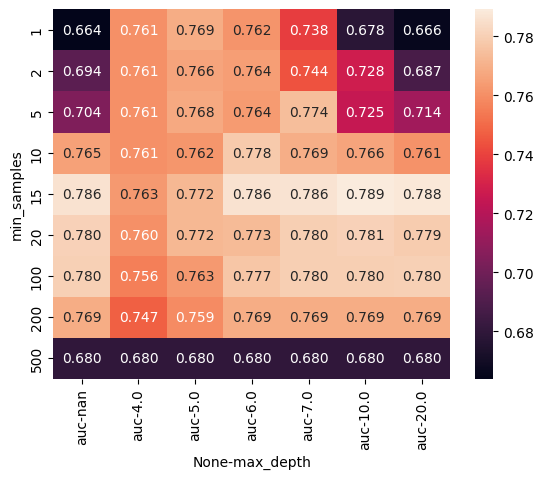

In [42]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [43]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

$$
\begin{align}
\text{Ensambles and random forest}\\
&\bullet\text{Board of experts}\\
&\bullet\text{Ensambling models}\\
&\bullet\text{Random forest - ensembling decision trees}\\
&\bullet\text{Tuning random forest}
&\text{}
\end{align}
$$

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [46]:
y_pred = rf.predict_proba(X_val)[:,1]

In [47]:
roc_auc_score(y_val,y_pred)

np.float64(0.7897604804921169)

In [48]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

In [49]:
scores=[]

for i in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=i, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((i, auc))

In [50]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

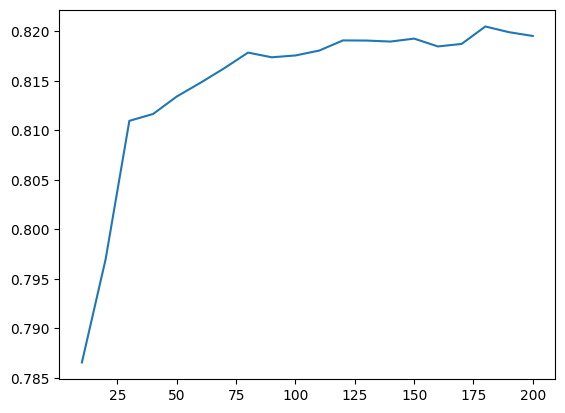

In [51]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [52]:
scores=[]

for j in [5,10,15]:
    for i in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=j,random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((j, i, auc))

In [53]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

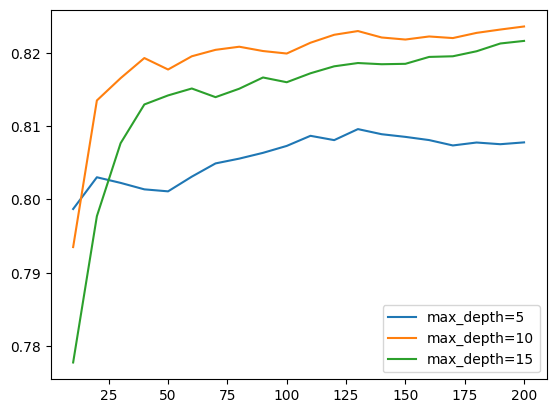

In [54]:
for i in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth == i]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % i)

plt.legend()

In [55]:
max_depth=10

In [56]:
scores=[]

for s in [1,3,5,10,50]:
    for i in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=i, min_samples_leaf=s,max_depth=max_depth,random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, i, auc))

In [57]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

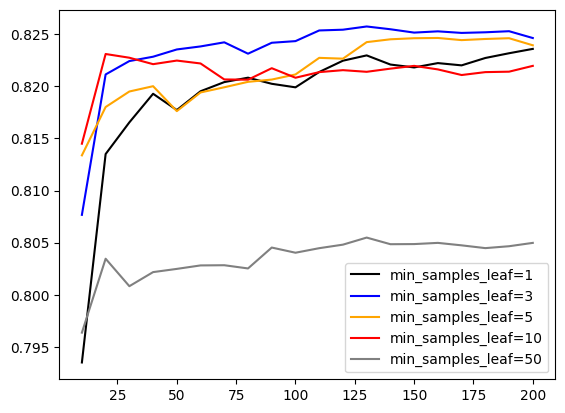

In [58]:
colors=['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values=[1,3,5,10,50]
for s,color in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, color=color,label='min_samples_leaf=%d' % s)

plt.legend()

In [59]:
min_samples_leaf=3

In [60]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=min_samples_leaf,max_depth=max_depth,random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1)

$$
\begin{align}
\text{Gradient boosting and XGBoost}\\
\bullet\text{Gradient boosting vs random forest}\\
\bullet\text{Installing XGBoost}\\
\bullet\text{Training the first model}\\
\bullet\text{Performance monitoring}\\
\bullet\text{Parsing xgboost's monitoring output}\\
\end{align}
$$

$$
\begin{align*}
\text{
}
\end{align*}
$$

1. Gradient Boosting
Gradient Boosting is an ensemble technique that builds models sequentially, each one trying to correct the errors of the previous one. Here’s how it works:

Weak Learners: Each new model is a weak learner, often a shallow decision tree.
Sequential Training: Unlike Random Forests (which use bagging and train trees in parallel), Gradient Boosting builds one tree at a time. Each tree corrects the mistakes made by the previous trees.
Minimizing Errors with Gradient Descent: In Gradient Boosting, each new tree attempts to minimize the residual error (difference between the actual and predicted values). The technique uses gradient descent to optimize and reduce errors in each step.
Learning Rate: Gradient Boosting applies a learning rate to control the contribution of each tree to the final prediction, preventing overfitting by slowing down learning.
Example Workflow:
Initial Prediction: Make an initial prediction using a simple model (e.g., a single decision tree).
Calculate Residuals: Calculate the residuals, or the errors made by the model.
Fit a New Tree: Train a new tree to predict these residuals.
Update the Prediction: Adjust the initial prediction with the output of the new tree, scaled by the learning rate.
Repeat: Continue this process, adding trees until you reach the desired number of trees or until the model stops improving.
Gradient Boosting’s flexibility and accuracy make it effective for both classification and regression tasks, but it can be computationally intensive and prone to overfitting without tuning.

2. XGBoost
XGBoost (Extreme Gradient Boosting) is an optimized version of the Gradient Boosting algorithm designed for speed and performance. It’s highly popular for machine learning competitions and practical applications due to its enhancements over traditional Gradient Boosting.

Key Features of XGBoost:
Regularization: XGBoost includes L1 and L2 regularization to prevent overfitting, a feature traditional Gradient Boosting does not have by default. This improves the model’s ability to generalize.
Parallelized Computation: XGBoost can perform parallel processing, making it much faster than traditional Gradient Boosting.
Tree Pruning: Instead of growing trees fully and pruning afterward, XGBoost uses a technique called depth-wise pruning. It stops growing a tree when further splits do not improve performance.
Handling Missing Data: XGBoost has built-in support for missing values and tries to learn the best way to handle them.
Optimized Objective Functions: XGBoost has several pre-implemented objective functions for regression, classification, and ranking problems, and it also supports custom objective functions.
Early Stopping: XGBoost has an early stopping feature that stops training when it detects that adding more trees no longer improves performance.
Example Workflow:
Initialize the model with an initial prediction.
Train a New Tree based on residuals as in Gradient Boosting, but with the added regularization and other optimizations.
Update the Model with the output of the new tree, scaled by the learning rate.
Repeat until the model performance stabilizes or early stopping criteria are met.
XGBoost is widely used in real-world applications because it’s fast, flexible, and often more accurate than traditional Gradient Boosting. Its regularization and efficiency in handling large datasets make it an excellent choice for machine learning tasks.

In [62]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.4/124.9 MB 7.6 MB/s eta 0:00:17
   ---------------------------------------- 0.9/124.9 MB 9.6 MB/s eta 0:00:13
   ---------------------------------------- 1.5/124.9 MB 10.2 MB/s eta 0:00:13
    --------------------------------------- 2.0/124.9 MB 10.6 MB/s eta 0:00:12
    --------------------------------------- 2.5/124.9 MB 10.7 MB/s eta 0:00:12
    --------------------------------------- 3.1/124.9 MB 11.0 MB/s eta 0:00:12
   - -------------------------------------- 3.6/124.9 MB 11.0 MB/s eta 0:00:12
   - -------------------------------------- 4.2/124.9 MB 11.1 MB/s eta 0:00:11
   - -------------------------------------- 4.7/124.9 MB 11.2 MB/s eta 0:00:11
   - -------------------------------------- 5.3/124.9 MB 11.2 MB/s eta 0:00:11
   - -------------------------------------- 5.8/124.9 MB 11.2 MB/s eta 0:00:11
   -- ------------------------------------- 6.4/124.9 MB 11.3 


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import xgboost as xgb

In [65]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [66]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [67]:
y_pred = model.predict(dval)

In [68]:
roc_auc_score(y_val, y_pred)

np.float64(0.8167699983047153)

In [69]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [70]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [71]:
s = output.stdout

In [74]:
s.split('\n')

['[0]\ttrain-auc:0.86743\tval-auc:0.78034',
 '[5]\ttrain-auc:0.93036\tval-auc:0.81321',
 '[10]\ttrain-auc:0.95358\tval-auc:0.81981',
 '[15]\ttrain-auc:0.96801\tval-auc:0.81931',
 '[20]\ttrain-auc:0.97500\tval-auc:0.81875',
 '[25]\ttrain-auc:0.98279\tval-auc:0.82061',
 '[30]\ttrain-auc:0.98724\tval-auc:0.81998',
 '[35]\ttrain-auc:0.99103\tval-auc:0.82048',
 '[40]\ttrain-auc:0.99393\tval-auc:0.81808',
 '[45]\ttrain-auc:0.99539\tval-auc:0.81659',
 '[50]\ttrain-auc:0.99736\tval-auc:0.81588',
 '[55]\ttrain-auc:0.99817\tval-auc:0.81380',
 '[60]\ttrain-auc:0.99925\tval-auc:0.81435',
 '[65]\ttrain-auc:0.99947\tval-auc:0.81424',
 '[70]\ttrain-auc:0.99972\tval-auc:0.81209',
 '[75]\ttrain-auc:0.99986\tval-auc:0.80922',
 '[80]\ttrain-auc:0.99989\tval-auc:0.81183',
 '[85]\ttrain-auc:0.99996\tval-auc:0.81175',
 '[90]\ttrain-auc:0.99998\tval-auc:0.81071',
 '[95]\ttrain-auc:0.99998\tval-auc:0.81113',
 '[100]\ttrain-auc:0.99999\tval-auc:0.81209',
 '[105]\ttrain-auc:1.00000\tval-auc:0.81070',
 '[110]\tt

In [75]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [76]:
df_score = parse_xgb_output(output)

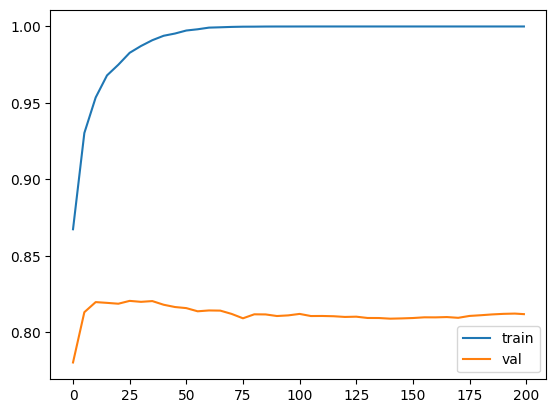

In [77]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

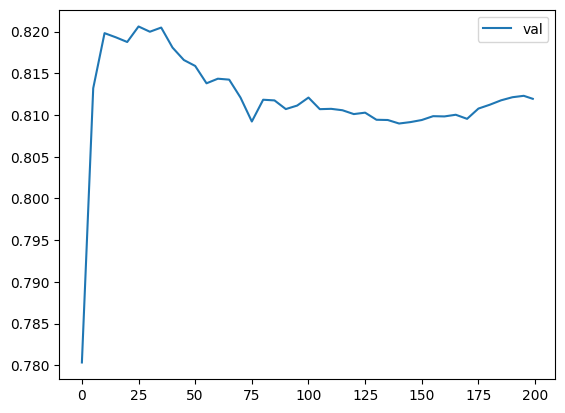

In [78]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

The model is generating overfitting

$$
\begin{align*}
\text{XGBoost parameter tuning}\\
\bullet\text{eta, learning rate ex: 1=100, step to improve the model}\\
\bullet\text{max depth}\\
\bullet\text{min child weight}\\
\end{align*}
$$

In [98]:
scores = {}

In [106]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [81]:
scores = {}

In [107]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [109]:
scores = {}

In [116]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [117]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [119]:
del scores['max_depth=10']

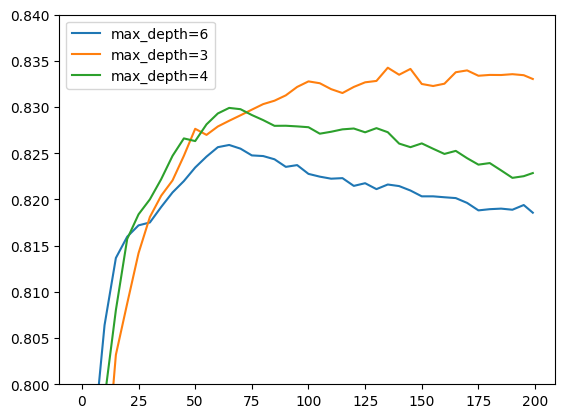

In [122]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

In [128]:
scores = {}

In [133]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [134]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

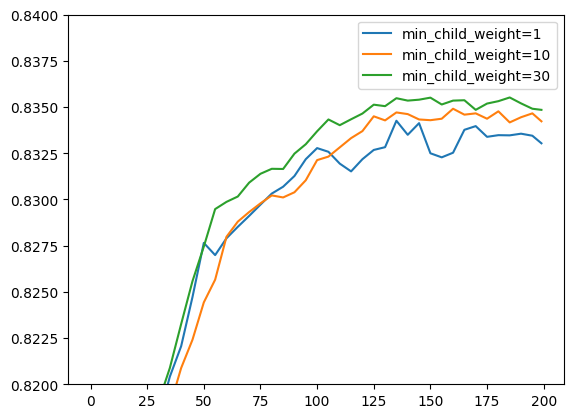

In [135]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.84)
plt.legend()

$$
\begin{align}
\text{Parameters}\\
\bullet\text{subsample: This parameter controls the fraction of the training data that each tree is trained on. 0-1}\\
\bullet\text{colsample bytree: This parameter controls the fraction of features (columns) that each tree considers when splitting nodes. 0-1}
\end{align}
$$

In [136]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

$$
\begin{align}
\text{Selecting the final model}\\
\bullet\text{Choosing between xgboost, random forest and decision tree}\\
\bullet\text{Training the final model}\\
\bullet\text{Saving the model}\\
\end{align}
$$

In [137]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [138]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7861125911215519)

In [139]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [140]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.8246258264512848)

In [141]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [142]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.8341436390496719)

Chose model with highest score and proceed to full train

In [144]:
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = (df_full_train.status == 'default').astype(int).values

del df_full_train['status']

In [145]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [148]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [149]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [150]:
y_pred = model.predict(dtest)

In [151]:
roc_auc_score(y_test, y_pred)

np.float64(0.8289367577342261)